# NYC restaurant data

I am interested in looking how the grades change over time. One of the first ideas I got was to aggregate all the grades in each month and plot that. 
I expect the number of grades to increase, and hopefully more As than any other grade, indicating that since 2011 Restaurants in NYC have conformed more to the cleanliness standards.

#### To Do:
+ see how the grades were awarded
+ what is required to get an A vs. any other grade
    + meaning what is the maximum number/type of violation to still receive an A 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import ggplot

In [2]:
start = dt.datetime.now()
nydata = pd.read_csv('NYC_Resto.csv')

print "the loading took {} seconds ".format((dt.datetime.now()-start).seconds)

the loading took 3 seconds 


### Some Data cleaning
+ remove unnecessary columns
+ remove 'Missing' values from the BORO column
+ remove 'Null' grades 
+ rename columns (temp) 
+ new DataFrame: **dates**

In [4]:
# unnecessary columns
nydata = nydata.drop(['CAMIS','PHONE','ZIPCODE','STREET', 'BUILDING','RECORD DATE'], axis=1)
# 'Missing' Boros
nydata = nydata[nydata['BORO']!='Missing']
# Null Grades
full_grade=pd.notnull(nydata['GRADE'])
nydata=nydata[full_grade]
nydata['BORO'].value_counts()

MANHATTAN        84447
BROOKLYN         50509
QUEENS           49912
BRONX            19654
STATEN ISLAND     7186
Name: BORO, dtype: int64

In [5]:
#rename columns, no spaces (this is convenient, we might get rid of it later)
nydata.columns=[c.replace(' ','_') for c in nydata.columns]

### change month to full name in 'INSPECTION_DATE'
+ smaller DataFrame with just dates and grades
+ change the 'INSPECTION DATE" to datetime (core numpy datatype which supports datetime functionality, **datetime64 dtype**)
+ also change index to **'INSPECTION DATE'**
+ change index to print out year and month name only

In [6]:
#dates.index=dates.INSPECTION_DATE
start = dt.datetime.now()
dates = nydata[['INSPECTION_DATE','GRADE_DATE','GRADE']]
dates.index =pd.to_datetime(nydata['INSPECTION_DATE'])
print "this took {} seconds".format((dt.datetime.now()-start).seconds)
#this takes a while

this took 69 seconds


In [9]:
#rename to month name
dates = dates.rename(index=lambda x:x.strftime('%Y-%B'))
# and here we leave off the day (?) 

AttributeError: 'str' object has no attribute 'strftime'

In [8]:
dates=dates[['GRADE_DATE', 'GRADE']]
dates[:3]

,GRADE_DATE,GRADE
INSPECTION_DATE,,
2015-February,02/04/2015,A
2015-February,02/09/2015,A
2014-August,08/16/2014,A


In [8]:
#Now sort it by date CHECK WHAT THE RANGE OF DATES IS? 
dates = dates.sort_index(axis=0)
dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211708 entries, 2011-July to 2016-May
Data columns (total 2 columns):
GRADE_DATE    210049 non-null object
GRADE         211708 non-null object
dtypes: object(2)
memory usage: 4.8+ MB


### Remove 'Not Yet Graded' ~ defeats the purpose of plotting grades
( there are about ~1600 'Not Yet Graded' but that's ok) 
**I want to plot A-Grades as function of time**

1. what are the ranges of dates that are available?
2. plot how many A's, B's etc. were awarded every month
3. need to bin data into months

In [9]:
dates=dates[dates['GRADE']!='Not Yet Graded']

### Divide dataframes by Grade, groupby INSPECTION_DATE to get a time  relationship
+ want how many of each of the grades were awarded in each month during the time period

In [10]:
dates['GRADE'][-5:]

INSPECTION_DATE
2016-May    A
2016-May    A
2016-May    A
2016-May    B
2016-May    B
Name: GRADE, dtype: object

In [11]:
# grade arrays
a_grades = dates[dates['GRADE']=='A'][['GRADE']]
b_grades = dates[dates['GRADE']=='B']
c_grades = dates[dates['GRADE']=='C']
p_grades = dates[dates['GRADE']=='P']
z_grades = dates[dates['GRADE']=='Z']

# grouped by date 
grouped_a = a_grades.groupby(a_grades.index)
grouped_b = b_grades.groupby(b_grades.index)
grouped_c = c_grades.groupby(c_grades.index)
grouped_p = p_grades.groupby(p_grades.index)
grouped_z = z_grades.groupby(z_grades.index)

# count up the grades in each month
grades_a_time = grouped_a.count()
grades_b_time = grouped_b.count()
grades_c_time = grouped_c.count()
grades_p_time = grouped_p.count()
grades_z_time = grouped_z.count()

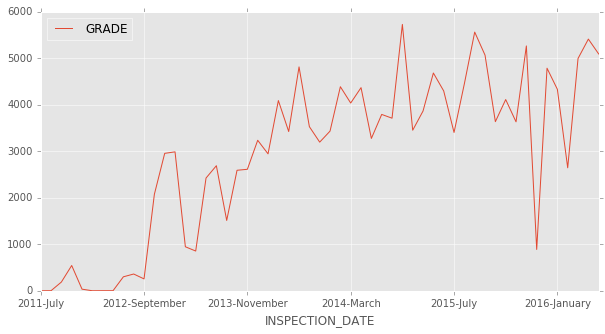

In [20]:
matplotlib.style.use('ggplot')
grades_a_time.plot(figsize=(10,5), label='A grades')
plt.legend(loc='upper left')

It appears as though the number of A-grades awarded to all restaurants is increasing over time. It might be a good idea to get a smoother curve though 
Things I could do to fix this: 
+ group the data every two months ? 
+ rather than the number, show this data as the fraction/percentage of all awarded grades? 

In [43]:
#nydata=nydata.sort_index(axis=0)
#nydata[['INSPECTION_DATE', 'GRADE']].sort_values('INSPECTION_DATE', ascending=True)

In [47]:
# find out the total number of grades in each month
grouped_total=dates[['GRADE']].groupby(dates.index)
grade_total= grouped_total.count()

In [102]:
grades_a_time = (grouped_a.count()/grade_total)*100
grades_b_time = (grouped_b.count()/grade_total)*100
grades_c_time = (grouped_c.count()/grade_total)*100
grades_p_time = (grouped_p.count()/grade_total)*100
grades_z_time = (grouped_z.count()/grade_total)*100

data = {'A':grades_a_time.values, 'B':grades_b_time.values , 'C':grades_c_time.values,
        'Z':grades_z_time.values,
     'P':grades_p_time.values} 
#df = pd.DataFrame(data, index=column)

In [116]:
grades_a_time.values[0]

array([ 100.])

In [109]:
a1=[]
for a in grades_a_time.values:
    a1.append(grades_a_time[a])
b1=[]
for b in grades_b_time.values:
    b1.append(b)

data1 = {'A':a1, 'B':b1}
#df = pd.DataFrame(data, index=column)
a1

[array([ 100.]),
 array([ 100.]),
 array([ 82.09606987]),
 array([ 75.45076283]),
 array([ 97.22222222]),
 array([ 33.33333333]),
 array([ 100.]),
 array([ 100.]),
 array([ 79.84084881]),
 array([ 78.8209607]),
 array([ 81.26984127]),
 array([ 74.66714646]),
 array([ 68.41009026]),
 array([ 74.77477477]),
 array([ 71.14951165]),
 array([ 77.09648332]),
 array([ 66.65750412]),
 array([ 71.35278515]),
 array([ 69.7235023]),
 array([ 71.62199503]),
 array([ 73.62637363]),
 array([ 71.99733096]),
 array([ 69.86951364]),
 array([ 75.4240413]),
 array([ 74.53754081]),
 array([ 81.81818182]),
 array([ 79.21903052]),
 array([ 75.41873083]),
 array([ 73.1884058]),
 array([ 75.24429967]),
 array([ 76.57879765]),
 array([ 79.29219601]),
 array([ 78.59884837]),
 array([ 73.73639191]),
 array([ 73.47585115]),
 array([ 78.14759242]),
 array([ 74.8536744]),
 array([ 78.54530679]),
 array([ 80.43963593]),
 array([ 81.72656399]),
 array([ 72.69427839]),
 array([ 75.58988287]),
 array([ 82.01650943]),
 

In [100]:
grades_a_time.values


array([[ 100.        ],
       [ 100.        ],
       [  82.09606987],
       [  75.45076283],
       [  97.22222222],
       [  33.33333333],
       [ 100.        ],
       [ 100.        ],
       [  79.84084881],
       [  78.8209607 ],
       [  81.26984127],
       [  74.66714646],
       [  68.41009026],
       [  74.77477477],
       [  71.14951165],
       [  77.09648332],
       [  66.65750412],
       [  71.35278515],
       [  69.7235023 ],
       [  71.62199503],
       [  73.62637363],
       [  71.99733096],
       [  69.86951364],
       [  75.4240413 ],
       [  74.53754081],
       [  81.81818182],
       [  79.21903052],
       [  75.41873083],
       [  73.1884058 ],
       [  75.24429967],
       [  76.57879765],
       [  79.29219601],
       [  78.59884837],
       [  73.73639191],
       [  73.47585115],
       [  78.14759242],
       [  74.8536744 ],
       [  78.54530679],
       [  80.43963593],
       [  81.72656399],
       [  72.69427839],
       [  75.589

In [94]:
column = grades_a_time.index.values
column.size

55

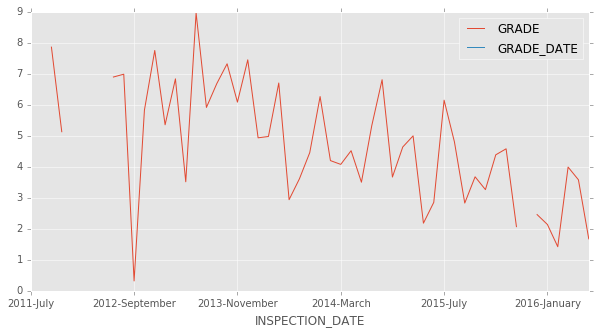

In [84]:
grades_c_time.plot(figsize=(10,5))

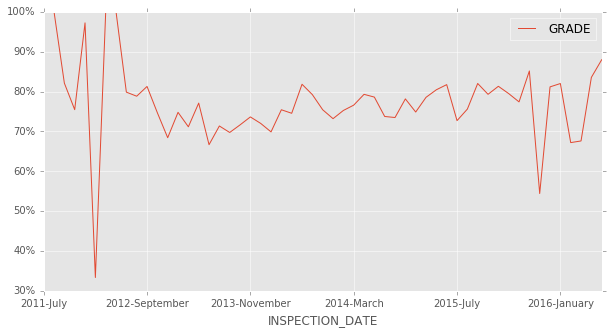

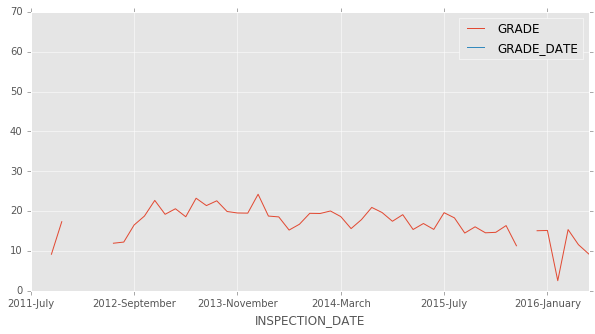

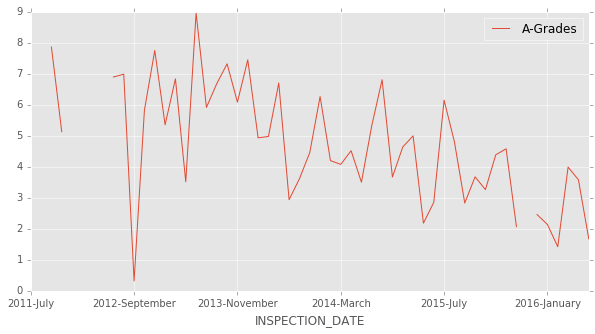

In [83]:
import matplotlib.ticker as mtick

matplotlib.style.use('ggplot')

fig = plt.figure() #size=(10,5)
#ax1 = fig.add_subplot(111)
 

#get your ax from here
ax = grades_a_time.plot(figsize=(10,5))
grades_b_time.plot(figsize=(10,5))
#grades_c_time.plot(figsize=(10,5))
#ax.plot(grades_a_time, label='A') # invalid literal for float

plt.legend(['A-Grades'], loc='upper right')#,labels="A-Grades")

#%format yticks as percentages 
fmt= '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)


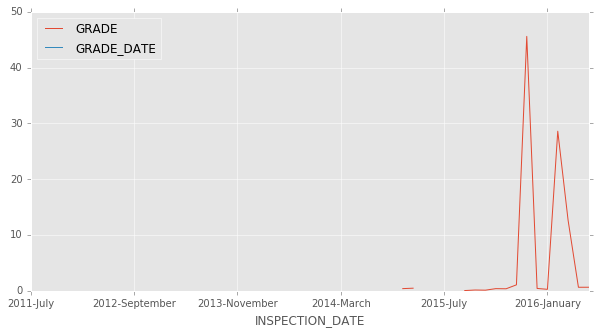

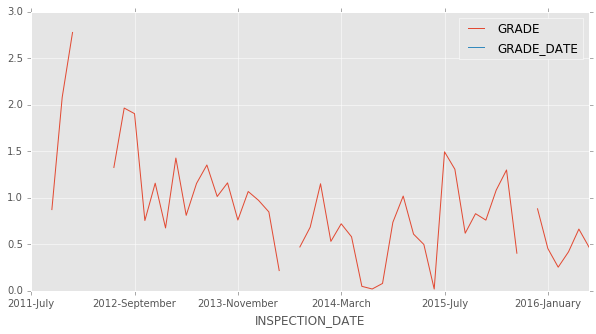

In [86]:
grades_z_time.plot(figsize=(10,5))
grades_p_time.plot(figsize=(10,5))

1. it looks like at the beginning there are only A grades, maybe not enough grades assigned
2. some B and C grades might have to be interpolated  -- have to interpolate
3. What is grade 'Z' and 'P'? if I knnow this it might be helpful in figuring out if I wanna keep it 

another issue that should be looked it is how to handle the first couple of data in 2011. since only A's were awarded it's not very illuminating.
What if I divide everything out by the average?  Would this change anything? 

In [29]:
grades_a_time[-10:]

,GRADE
INSPECTION_DATE,
2015-October,4113
2015-September,3633
2016-April,5266
2016-August,889
2016-February,4787
2016-January,4333
2016-July,2645
2016-June,4996
2016-March,5413
